# Całkowanie numeryczne
Laboratorium 12 - Metody Obliczeniowe w Nauce i Technice

In [28]:
import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt
import time

## Funkcje

1. $f_1 = e^{-x^2}(\ln{x})^2$
2. $f_2 = \frac{1}{x^3 - 2x - 5}$

In [7]:
def f1(x: float) -> float:
    return np.exp(-x**2) * np.log(x)**2


def f2(x: float) -> float:
    return 1 / (x**3 - 2*x - 5)


def f3(x: float) -> float:
    return x**5 * np.exp(-x) * np.sin(x)


def f4(x: float, y: float) -> float:
    if not (0 <= x <= 1 and 0 <= y <= 1 - x):
        return np.nan
    return 1 / (np.sqrt(x + y) * (1 + x + y))


def f5(x: float, y: float) -> float:
    if not (-3 <= x <= 3 and -5 <= y <= 5):
        return np.nan
    return x**2 + y**2

C:\Users\Jakub\AppData\Local\Temp\ipykernel_14480\3056891540.py:2: RuntimeWarning: invalid value encountered in log
  return np.exp(-x**2) * np.log(x)**2


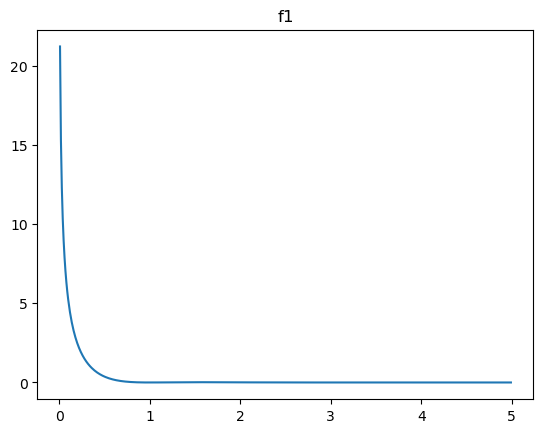

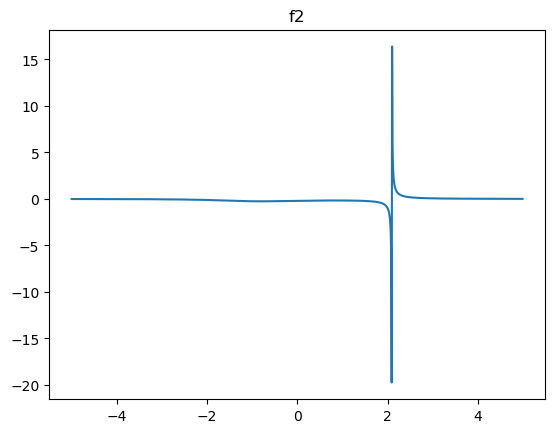

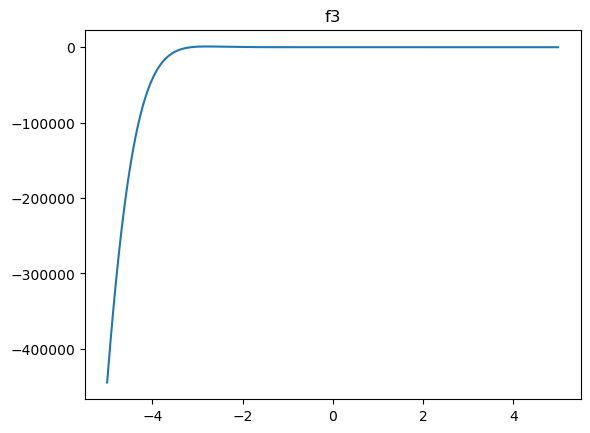

In [14]:
def plot_f(f: callable, title: str, is_2d: bool) -> None:
    xs: np.ndarray = np.arange(-5, 5, 0.01)
    ys: np.ndarray = np.arange(-5, 5, 0.01)

    plt.figure()
    plt.title(title)

    zs: np.ndarray = np.empty(0)
    if not is_2d:
        zs = np.array([f(x) for x in xs])
        plt.plot(xs, zs)
    else:
        zs = np.array([f(x, y) for x in xs for y in ys])
        plt.plot(xs, ys, zs)

    plt.show()


plot_f(f1, "f1", False)
plot_f(f2, "f2", False)
plot_f(f3, "f3", False)
# plot_f(f4, "f4", True)
# plot_f(f5, "f5", True)

## Zadanie 1. Próbki prędkości i przebyta droga.

## Zadanie 2. Złożona kwadratura Simpsona.

In [41]:
def simpsons_1r3(f: callable, xs: np.ndarray, ys: np.ndarray) -> float:
    a, b = xs[0], xs[-1]
    h: float = (b - a) / 2

    def xi(i: int) -> int:
        return a + i * h

    result: float = 0.0
    for i in range(ys.shape[0] // 2):
        result += h / 3 * (f(xi(2*i - 2)) + 4*f(xi(2*i - 1)) + f(xi(2*i)))
    return result

In [42]:
class Test:
    FUNCTIONS: list[callable] = [ f1, f2, f3 ]
    INTERVALS: list[list[tuple[float, float]]] = [
        [ (0.5, 1), (0.25, 1), (0.1, 1), (0.001, 1) ],
        [ (0, 1), (0, 2), (2, 3), (2, 4) ],
        [ (0, .5), (0, 2), (-1, 0), (-2, 0) ]
    ]

    def __init__(self) -> None:
        pass

    def run(self) -> None:
        for i, f in enumerate(Test.FUNCTIONS):
            print(f"f{i}")
            for a, b in Test.INTERVALS[i]:
                xs: np.ndarray = np.arange(a, b, 0.01)
                ys: np.ndarray = np.array([f(x) for x in xs])
                my_quadrature: float = simpsons_1r3(f, xs, ys)
                sp_quadrature = sp.integrate.quadrature(f, a, b)
            
                print(f"Quadratures absolute value for [{a}, {b}]: {abs(my_quadrature - sp_quadrature[0])}")
            print()
                
                
tests = Test()
tests.run()

f0
Quadratures absolute value for [0.5, 1]: 2.34959248099218
Quadratures absolute value for [0.25, 1]: nan
Quadratures absolute value for [0.1, 1]: nan
Quadratures absolute value for [0.001, 1]: nan

f1
Quadratures absolute value for [0, 1]: 0.46693942283992634
Quadratures absolute value for [0, 2]: 0.7391171614346062
Quadratures absolute value for [2, 3]: 0.2518054502061896
Quadratures absolute value for [2, 4]: 0.8079580808785088

f2
Quadratures absolute value for [0, 0.5]: 15.332779478187842
Quadratures absolute value for [0, 2]: 55.30120172658511
Quadratures absolute value for [-1, 0]: 41.7973174406436
Quadratures absolute value for [-2, 0]: 12595.988567051458



C:\Users\Jakub\AppData\Local\Temp\ipykernel_14480\3056891540.py:2: RuntimeWarning: invalid value encountered in log
  return np.exp(-x**2) * np.log(x)**2


### Zadanie 3. Oznaczone całki podwójne.

1.

2.